In [ ]:
# Add packagers
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

!pip install opendatasets --quiet
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/competitions/playground-series-s6e1/data")

Skipping, found downloaded files in "./playground-series-s6e1" (use force=True to force download)


In [ ]:
 #read data
train = pd.read_csv('/content/playground-series-s6e1/train.csv')
test = pd.read_csv('/content/playground-series-s6e1/test.csv')
subm = pd.read_csv('/content/playground-series-s6e1/sample_submission.csv')


In [ ]:
# check data
print(train.head())
print(test.head())
print(subm)

   id  age  gender   course  study_hours  class_attendance internet_access  \
0   0   21  female     b.sc         7.91              98.8              no   
1   1   18   other  diploma         4.95              94.8             yes   
2   2   20  female     b.sc         4.68              92.6             yes   
3   3   19    male     b.sc         2.00              49.5             yes   
4   4   23    male      bca         7.65              86.9             yes   

   sleep_hours sleep_quality   study_method facility_rating exam_difficulty  \
0          4.9       average  online videos             low            easy   
1          4.7          poor     self-study          medium        moderate   
2          5.8          poor       coaching            high        moderate   
3          8.3       average    group study            high        moderate   
4          9.6          good     self-study            high            easy   

   exam_score  
0        78.3  
1        46.7  
2       

In [ ]:
# Drop Columns
if 'id' in train.columns:
    train_df = train.drop('id', axis=1)
    test_df = test.drop('id', axis=1)

In [ ]:
#split data
target = 'exam_score'
all_data = pd.concat([train.drop(target, axis=1), test], axis=0)

In [ ]:
# one host encoding for catagarize
all_data = pd.get_dummies(all_data, drop_first=True)

In [ ]:
# Split back into train and test
X = all_data[:len(train)]
y = train[target]
X_test = all_data[len(train):]

In [ ]:
#initialize the model
model = XGBRegressor(
    n_estimators=2400,
    learning_rate=0.06,
    max_depth=10,
    random_state=60,
    n_jobs=-1
)

In [ ]:
#cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=60)

In [ ]:
# calculate RMSE
scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=kf)
print(f"Average RMSE Score: {-scores.mean()}")

Average RMSE Score: 9.039705980285925


In [ ]:
#fit on data
model.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.06, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=2400,
             n_jobs=-1, num_parallel_tree=None, ...)

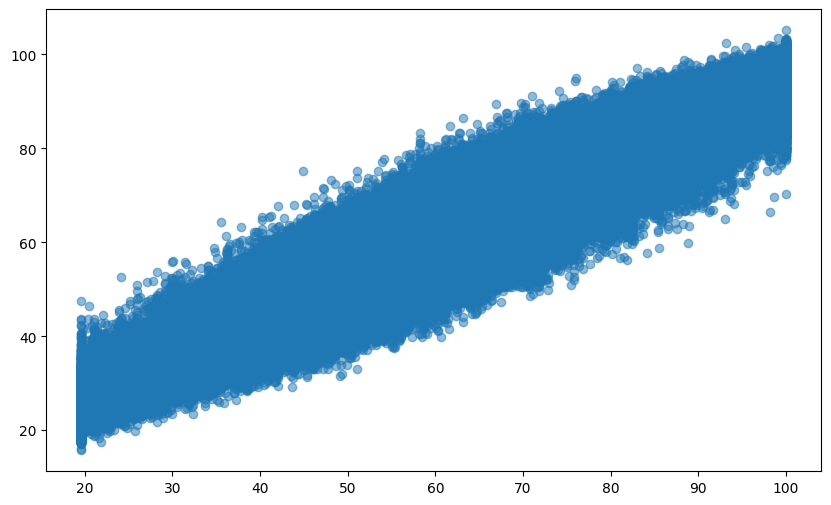

In [ ]:
#plot resilts
plt.figure(figsize=(10, 6))
plt.scatter(y, model.predict(X), label='Training Data', alpha=0.5)

/tmp/ipython-input-3654929795.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


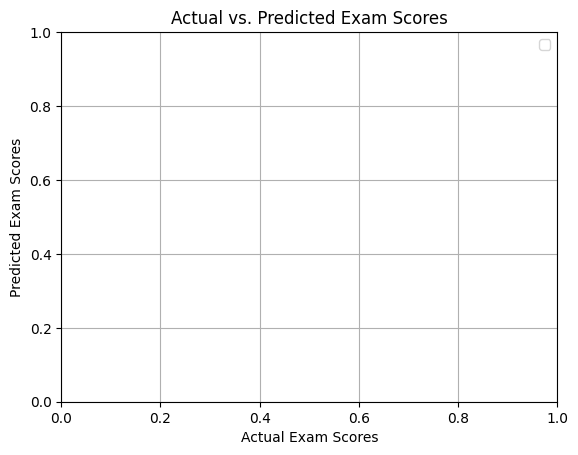

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs. Predicted Exam Scores')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('actual_vs_predicted.png')

In [ ]:
#predict on the test data

predictions = model.predict(X_test)


In [ ]:
# create submition file
subm['target'] = predictions
subm.to_csv('submission1.csv', index=False)
print("Submission file created successfully!")

Submission file created successfully!


In [ ]:
# 1. Save the model in the native XGBoost JSON format
model.save_model("exam_score_xgb_model.json")
print("Model saved as JSON.")

# 2. (Optional) Save using Joblib (Standard for Scikit-Learn style pipelines)
import joblib
joblib.dump(model, "exam_score_xgb_model.joblib")
print("Model saved as Joblib.")

# 3. Download the files to your computer
from google.colab import files
files.download("exam_score_xgb_model.json")

Model saved as JSON.
Model saved as Joblib.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>